# Dataset cleaning
There are 3 aims of this notebook:
- Get familiar with the dataset
- Examine the quality of the dataset
- Address any data quality issue(s)

In [1]:
# Auto-reload modules when code changes, no need to restart the kernel.
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data ingestion

In [3]:
dataframe = pd.read_csv("/mnt/d/Opportunities/Jobs/datasets/api_anomaly/supervised_dataset.csv")
dataframe.head(5)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


## Data profiling

In [4]:
print("Original shape:", dataframe.shape)
print("Columns:", dataframe.columns)

Original shape: (1699, 12)
Columns: Index(['Unnamed: 0', '_id', 'inter_api_access_duration(sec)',
       'api_access_uniqueness', 'sequence_length(count)',
       'vsession_duration(min)', 'ip_type', 'num_sessions', 'num_users',
       'num_unique_apis', 'source', 'classification'],
      dtype='object')


There are 1699 rows and 12 columns in the dataframe

In [5]:
# Overall descriptive statistics of the dataframe
dataframe.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1699.00000,1695.000000,1695.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,849.00000,1.501123,0.173226,61.648982,6.028341e+03,564.726898,406.263685,67.246616
std,490.60337,21.697558,0.283641,205.803273,4.665042e+04,1179.931200,960.718580,82.189214
min,0.00000,0.000003,0.001200,0.000000,1.000000e+00,2.000000,1.000000,0.000000
25%,424.50000,0.000707,0.009199,9.984756,6.300000e+01,5.000000,1.000000,14.000000
50%,849.00000,0.002574,0.018717,17.095238,1.950000e+02,164.000000,141.000000,37.000000
75%,1273.50000,0.024579,0.230769,41.349478,3.711500e+03,446.500000,308.500000,90.000000
max,1698.00000,852.929250,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


In [ ]:
# Find rows with missing value(s)
rows_with_missing = dataframe[dataframe.isnull().any(axis=1)]
rows_with_missing.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1556,1556,8e8b99bb-7b6d-3437-9abc-1d884fe023d0,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1567,1567,bedfd600-80ef-3e95-8667-fa0d9a905d72,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier
1619,1619,60a25ad0-add8-3976-bc51-a7ff6779d5dc,NaN,NaN,0.0,3,datacenter,2.0,1.0,0.0,E,outlier
1647,1647,70b6a9dd-e4c6-36a0-908d-2311c277b5e8,NaN,NaN,0.0,3,datacenter,4.0,1.0,0.0,E,outlier


### Overall observations:
- The dataset is quite clean, with only 4 rows with missing values
- There are some extreme outliers in inter_api_access_duration(sec) and vsession_duration(min) columns, because the max values in these columns are greater than the 75% percentile values

### Observation concerning missing data:
- 4 rows with missing data all come from datacenter and are classes as outliers
- sequence_length(count) is equal to zero in these rows. This means that no API calls were made with these ids

### Impact:
These rows can be dropped since they're not supposed to be in this dataset - no API calls were made

## Outliers

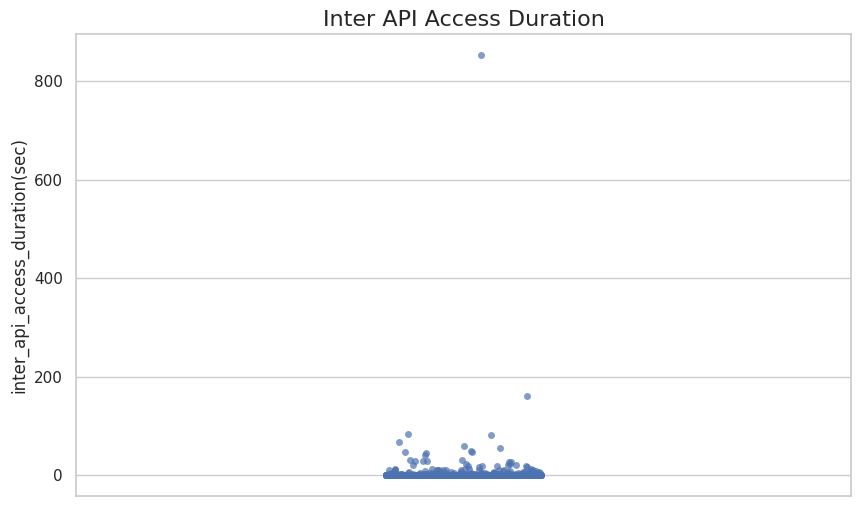

In [7]:
# Make a plot to see the distribution of inter_api_access_duration(sec)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.stripplot(data=dataframe, y="inter_api_access_duration(sec)", jitter=True, alpha=0.7)

plt.title("Inter API Access Duration", fontsize=16)

plt.show()

### Observation
There are two extreme outliers in inter_api_access_duration(sec), each being greater than 100 seconds in each API call

In [8]:
# Review the 2 rows with extreme outliers concerning inter_api_access_duration(sec)
outliers_1 = dataframe[dataframe["inter_api_access_duration(sec)"] > 100]
outliers_1.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1693,1693,d8ac0f74-473a-32c2-b79f-d00d051ddd80,159.783857,0.357143,14.0,134219,datacenter,2.0,1.0,5.0,F,outlier
1695,1695,44356d09-52e9-321e-9ec1-630e582bfe53,852.929250,0.500000,2.0,102352,datacenter,2.0,1.0,1.0,F,outlier


### Observations:
- The inter_api_access_duration(sec) outliers all come from datacenter
- These data points seem valid even though they are outliers

### Impact
These rows won't be dropped

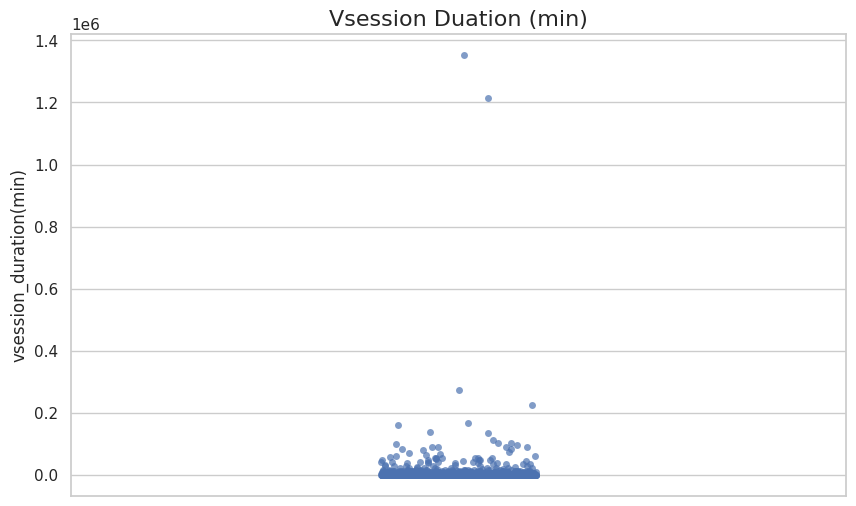

In [9]:
# Make a plot to see the distribution of vsession_duration(min)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.stripplot(data=dataframe, y="vsession_duration(min)", jitter=True, alpha=0.7)

plt.title("Vsession Duation (min)", fontsize=16)

plt.show()

Observation
There are two extreme outliers in vsession_duration(min), each being greater than 1 million minutes in each API call

In [10]:
# Review the 2 rows with extreme outliers concerning vsession_duration(min)
outliers_2 = dataframe[dataframe["vsession_duration(min)"] > 1_000_000]
outliers_2.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1292,1292,71f7d8a9-9f50-35b3-84c7-839780fea2d7,29.826886,0.038360,756.0,1352948,default,6.0,1.0,29.0,E,outlier
1494,1494,7903be9c-c393-3fce-b027-3395dddecf57,30.854924,0.039634,656.0,1214450,default,5.0,1.0,26.0,E,outlier


### Observations:
- The vsession_duration(min) outliers all come from default
- These data points seem valid even though they are outliers

### Impact
These rows won't be dropped

## Data preprocessing pipeline
According to the analysis above, the following data cleaning and preprocessing steps will be taken:

- Rows with null values are removed
- Classification variable will be turned into a boolean for ease of the analysis
- Data will be outputed as a CSV file with no numerical ID index

In [11]:
def cleaning_function(input_csv, output_csv):
    """
    Reads a CSV file, applies transformations, and outputs the result as a Parquet file.
    
    Parameters:
    - input_csv (str): Path to the input CSV file.
    - output_csv (str): Path to the output CSV file.
    """
    dataframe = pd.read_csv("/mnt/d/Opportunities/Jobs/datasets/api_anomaly/supervised_dataset.csv")
    
    dataframe = dataframe.dropna()

    dataframe["is_anomaly"] = dataframe["classification"] == "outlier"

    dataframe.to_csv(output_csv, index=False)

In [12]:
input_csv = "/mnt/d/Opportunities/Jobs/datasets/api_anomaly/supervised_dataset.csv"
output_csv = "/mnt/c/Users/haanh/api-behavior-anomaly/data/supervised_clean_data.csv"
cleaning_function(input_csv, output_csv)